analysis job vision data for jobs in iran 

import libraries

In [71]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re 

In [72]:


# ==========================
# 1. خواندن دیتا
# ==========================
df = pd.read_csv("C:\\Users\\Sepehr\\ML_file\\JobVision_Jobposts_Dataset.csv")
df.head()
df.describe()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364838 entries, 0 to 364837
Data columns (total 43 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   RowNumber                                        364838 non-null  int64  
 1   Jobpost_RawTitle                                 364838 non-null  object 
 2   Jobpost_PreferredGender                          364838 non-null  object 
 3   Jobpost_ProvinceFa                               364838 non-null  object 
 4   Jobpost_ProvinceEn                               364838 non-null  object 
 5   Jobpost_WorkTypeFa                               364838 non-null  object 
 6   Jobpost_WorkTypeEn                               364838 non-null  object 
 7   Jobpost_SalaryCanBeShown                         364838 non-null  bool   
 8   Jobpost_MinSalary                                120808 non-null  float64
 9   Jobpost_MaxSala

Index(['RowNumber', 'Jobpost_RawTitle', 'Jobpost_PreferredGender',
       'Jobpost_ProvinceFa', 'Jobpost_ProvinceEn', 'Jobpost_WorkTypeFa',
       'Jobpost_WorkTypeEn', 'Jobpost_SalaryCanBeShown', 'Jobpost_MinSalary',
       'Jobpost_MaxSalary', 'Jobpost_MainJobCategory',
       'Jobpost_SecondaryJobCategories', 'Jobpost_IndustryFa',
       'Jobpost_IndustryEn', 'Jobpost_RequiredExperienceYears',
       'Jobpost_RequiredRelatedExperienceInThisIndustry',
       'Jobpost_CompanyWorkTimesDescription', 'Jobpost_LanguageSkills',
       'Jobpost_SoftwareSkills', 'Jobpost_AcademicFields', 'Jobpost_BenefitFa',
       'Jobpost_BenefitEn', 'Jobpost_HasDisabilitySupport',
       'Jobpost_RequiredMinAge', 'Jobpost_RequiredMaxAge',
       'Jobpost_RequiredMilitaryServiceCard', 'Jobpost_IsRemote',
       'Jobpost_IsInternship', 'Jobpost_PriorityWithLocalCandidate',
       'Jobpost_ActivationTime_YEAR_MONTH', 'Company_AgeFromEstablishmentYear',
       'Company_ProvinceFa', 'Company_ProvinceEn', 'Comp

In [73]:


# ==========================
# 2. انتخاب ستون‌های مورد نیاز
# ==========================
new_columns = [
    'Jobpost_RawTitle', 'Jobpost_MainJobCategory', 'Jobpost_IndustryFa', 'Jobpost_WorkTypeFa',
    'Jobpost_IsRemote', 'Jobpost_IsInternship', 'Jobpost_PreferredGender',
    'Jobpost_RequiredExperienceYears', 'Jobpost_RequiredRelatedExperienceInThisIndustry',
    'Jobpost_RequiredMaxAge', 'Jobpost_RequiredMilitaryServiceCard',
    'Jobpost_LanguageSkills', 'Jobpost_SoftwareSkills', 'Jobpost_AcademicFields',
    'Jobpost_SalaryCanBeShown', 'Jobpost_MinSalary', 'Jobpost_MaxSalary',
    'Jobpost_ProvinceFa', 'Company_ProvinceFa', 'Company_CityFa',
    'Comany_CompanyOwnershipTypesFa', 'Company_SizeFa', 'Company_ActivityTypeFa',
    'Company_IndustryFa', 'Company_AgeFromEstablishmentYear',
    'Jobpost_ActivationTime_YEAR_MONTH', 'Jobpost_PriorityWithLocalCandidate'
]

df_new = df[new_columns].copy()
df_new.columns
pd.reset_option('display.max_columns')
df_new.head(24)


,Jobpost_RawTitle,Jobpost_MainJobCategory,Jobpost_IndustryFa,Jobpost_WorkTypeFa,Jobpost_IsRemote,Jobpost_IsInternship,Jobpost_PreferredGender,Jobpost_RequiredExperienceYears,Jobpost_RequiredRelatedExperienceInThisIndustry,Jobpost_RequiredMaxAge,...,Jobpost_ProvinceFa,Company_ProvinceFa,Company_CityFa,Comany_CompanyOwnershipTypesFa,Company_SizeFa,Company_ActivityTypeFa,Company_IndustryFa,Company_AgeFromEstablishmentYear,Jobpost_ActivationTime_YEAR_MONTH,Jobpost_PriorityWithLocalCandidate
0,مهندس مکانیک,مهندسی مکانیک / مهندسی هوا و فضا,تولیدی / صنعتی,پاره وقت,False,False,تفاوتی ندارد,1,False,35.0,...,تهران,تهران,تهران,خصوصی,11 تا 50 نفر,شرکت ایرانی دارای مشتریان داخلی,"ساختمان / مصالح و تجهیزات ساختمانی,تولیدی / صنعتی",more than 20 years,2022-04,False
1,طراح و گرافیست,طراحی گرافیک / طراحی انیمیشن و موشن گرافیک,طراحی / گرافیک / هنر,تمام وقت,False,False,تفاوتی ندارد,3,False,33.0,...,تهران,تهران,تهران,خصوصی,11 تا 50 نفر,شرکت ایرانی دارای مشتریان داخلی و خارجی,طراحی / گرافیک / هنر,10 - 14 years,2023-03,True
2,برنامه نویس full-stack,توسعه نرم افزار و برنامه نویسی,اینترنت / تجارت الکترونیک / خدمات آنلاین,تمام وقت,False,False,تفاوتی ندارد,3,True,35.0,...,خراسان رضوی,خراسان رضوی,مشهد,خصوصی,زیر 10 نفر,شرکت ایرانی دارای مشتریان داخلی و خارجی,"اینترنت / تجارت الکترونیک / خدمات آنلاین,شرکت ...",5 - 9 years,2022-04,False
3,بازاریاب - خانم,فروش و بازاریابی - فروشنده / بازاریاب و ویزیتو...,اینترنت / تجارت الکترونیک / خدمات آنلاین,تمام وقت,False,False,فقط خانم,0,False,40.0,...,البرز,البرز,کرج,خصوصی,زیر 10 نفر,شرکت ایرانی دارای مشتریان داخلی,"اینترنت / تجارت الکترونیک / خدمات آنلاین,خرده ...",10 - 14 years,2023-12,True
4,برنامه نویس React Native,توسعه نرم افزار و برنامه نویسی,فناوری اطلاعات / نرم افزار و سخت افزار,پاره وقت,False,False,تفاوتی ندارد,1,True,30.0,...,اصفهان,اصفهان,اصفهان,خصوصی,501 تا 1000 نفر,شرکت ایرانی دارای مشتریان داخلی و خارجی,فناوری اطلاعات / نرم افزار و سخت افزار,more than 20 years,2022-07,True
5,طراح وب وردپرس - خانم,دیجیتال مارکتینگ و سئو,فناوری اطلاعات / نرم افزار و سخت افزار,تمام وقت,False,False,فقط خانم,3,True,35.0,...,تهران,تهران,تهران,خصوصی,زیر 10 نفر,شرکت ایرانی دارای مشتریان داخلی,فناوری اطلاعات / نرم افزار و سخت افزار,10 - 14 years,2023-11,True
6,کارشناس ارشد امور بانکی و ارزی و سامانه نیما,مالی و حسابداری,تجارت / بازرگانی,تمام وقت,False,False,تفاوتی ندارد,3,True,50.0,...,تهران,تهران,تهران,خصوصی,زیر 10 نفر,شرکت ایرانی دارای مشتریان داخلی,تجارت / بازرگانی,5 - 9 years,2022-04,False
7,کارشناس ارشد خرید خارجی (فلزات گرانبها),بازرگانی / تجارت,تجارت / بازرگانی,تمام وقت,False,False,تفاوتی ندارد,3,True,50.0,...,تهران,تهران,تهران,خصوصی,زیر 10 نفر,شرکت ایرانی دارای مشتریان داخلی,تجارت / بازرگانی,5 - 9 years,2022-04,False
8,کارشناس ارشد خرید خارجی (قطعات نفت، گاز و پترو...,خرید / تدارکات,تجارت / بازرگانی,تمام وقت,False,False,تفاوتی ندارد,3,True,50.0,...,تهران,تهران,تهران,خصوصی,زیر 10 نفر,شرکت ایرانی دارای مشتریان داخلی,تجارت / بازرگانی,5 - 9 years,2022-04,False
9,طراح سایت وردپرس - خانم,توسعه نرم افزار و برنامه نویسی,فناوری اطلاعات / نرم افزار و سخت افزار,تمام وقت,False,False,فقط خانم,2,True,35.0,...,تهران,تهران,تهران,خصوصی,زیر 10 نفر,شرکت ایرانی دارای مشتریان داخلی,فناوری اطلاعات / نرم افزار و سخت افزار,10 - 14 years,2023-11,True


In [74]:

# ==========================
# 3. بررسی داده‌های گمشده
# ==========================
df_new.isnull().sum()
df_new[["Jobpost_LanguageSkills","Jobpost_SoftwareSkills","Jobpost_AcademicFields"]].head(20)
df_new['Company_ActivityTypeFa'].value_counts()


Company_ActivityTypeFa
شرکت ایرانی دارای مشتریان داخلی و خارجی    146047
شرکت ایرانی دارای مشتریان داخلی            125232
شعبه ای از یک شرکت خارجی / سفارتخانه         6047
Name: count, dtype: int64

In [75]:

# ==========================
# 4. مدیریت داده‌های گمشده
# ==========================

# -- ایمپیوت اعداد
num_cols = ['Jobpost_MinSalary']   # حذف Jobpost_MaxSalary برای جلوگیری از نشت هدف
num_imputer = SimpleImputer(strategy='mean')
df_new[num_cols] = num_imputer.fit_transform(df_new[num_cols])

# -- ایمپیوت متن‌ها با مقدار ثابت
text_cols_fill_not_mentioned = [
    'Jobpost_LanguageSkills', 'Jobpost_SoftwareSkills',
    'Jobpost_AcademicFields', 'Company_CityFa'
]
text_imputer = SimpleImputer(strategy='constant', fill_value='not mentioned')
df_new[text_cols_fill_not_mentioned] = text_imputer.fit_transform(df_new[text_cols_fill_not_mentioned])

# -- ایمپیوت ستون‌هایی که با مد پر می‌شوند
mode_fill_cols = ['Jobpost_RequiredMaxAge', 'Comany_CompanyOwnershipTypesFa']
for col in mode_fill_cols:
    if col in df_new.columns:
        mode_value = df_new[col].mode()
        fill_value = mode_value[0] if not mode_value.empty else 'نامشخص'
        df_new[col] = df_new[col].fillna(fill_value)

# -- ایمپیوت ستون Company_ActivityTypeFa با پرتکرارترین مقدار
activity_col = 'Company_ActivityTypeFa'
if activity_col in df_new.columns:
    freq = df_new[activity_col].value_counts()
    if len(freq) > 2:
        freq_middle = freq.iloc[1:-1]
        fill_value = freq_middle.idxmax()
    else:
        fill_value = df_new[activity_col].mode()[0]
    df_new[activity_col] = df_new[activity_col].fillna(fill_value)

df_new.columns
df_new.isnull().sum()


Jobpost_RawTitle                                        0
Jobpost_MainJobCategory                                 0
Jobpost_IndustryFa                                      0
Jobpost_WorkTypeFa                                      0
Jobpost_IsRemote                                        0
Jobpost_IsInternship                                    0
Jobpost_PreferredGender                                 0
Jobpost_RequiredExperienceYears                         0
Jobpost_RequiredRelatedExperienceInThisIndustry         0
Jobpost_RequiredMaxAge                                  0
Jobpost_RequiredMilitaryServiceCard                     0
Jobpost_LanguageSkills                                  0
Jobpost_SoftwareSkills                                  0
Jobpost_AcademicFields                                  0
Jobpost_SalaryCanBeShown                                0
Jobpost_MinSalary                                       0
Jobpost_MaxSalary                                  244030
Jobpost_Provin

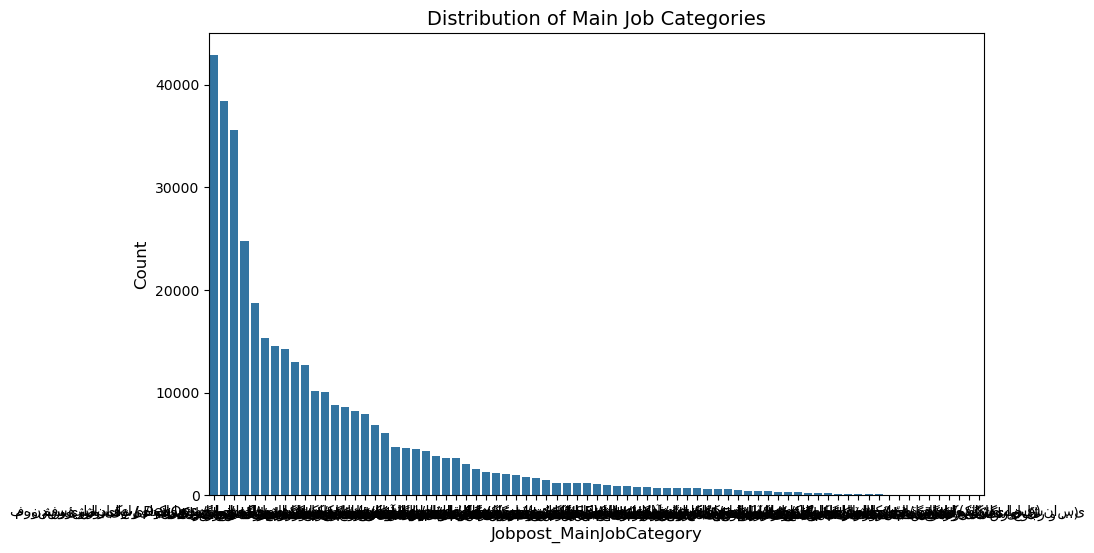

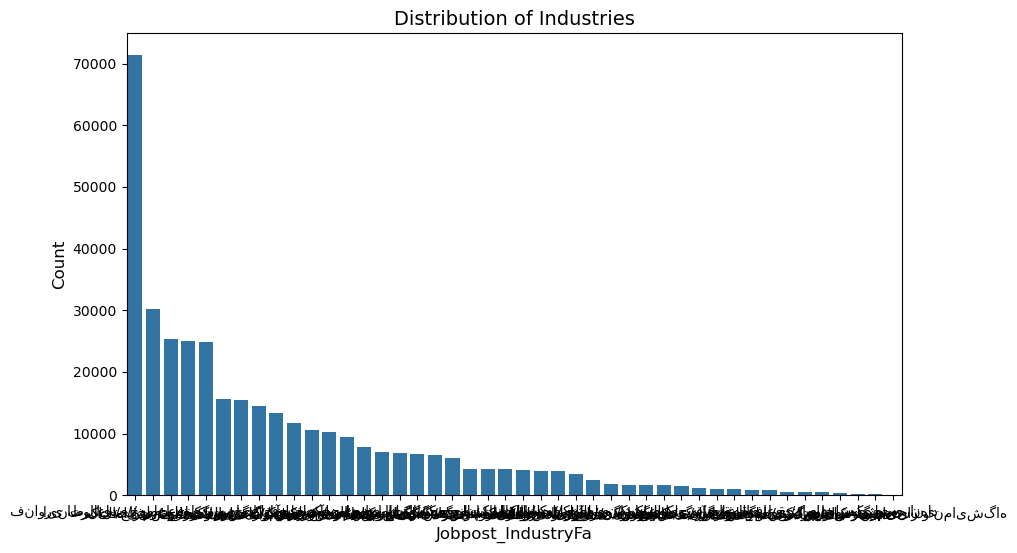

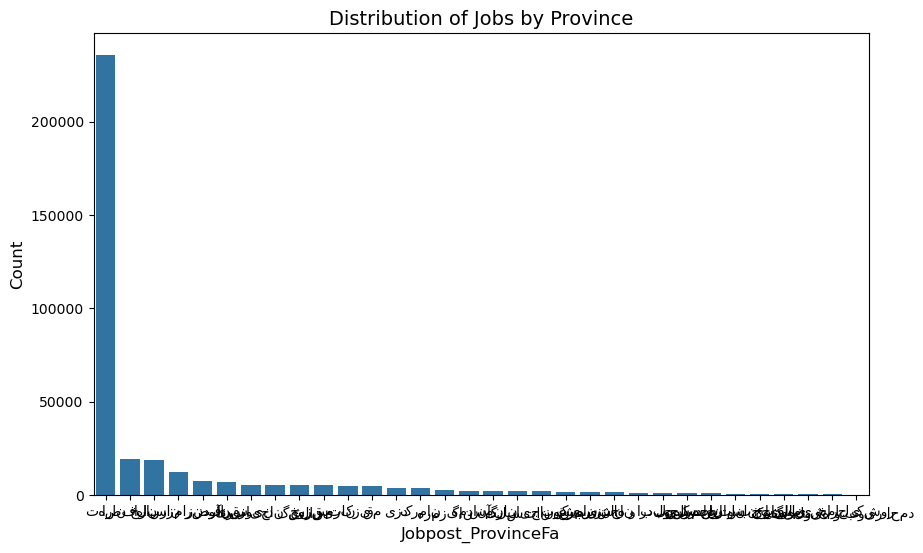

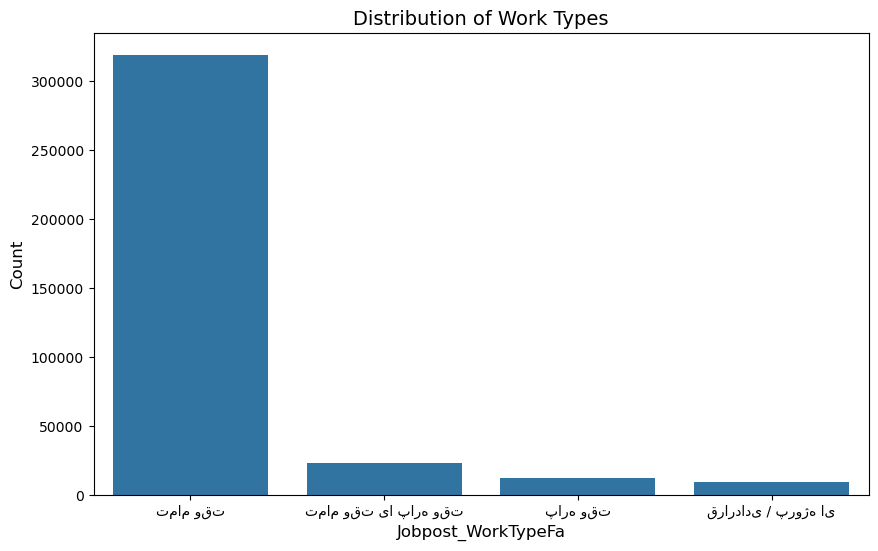

In [76]:
# ==========================
# 5. توابع ترسیم نمودار
# ==========================
def plot_categorical_distribution(column, title, filename):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_new, x=column, order=df_new[column].value_counts().index)
    plt.title(title, fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    # plt.xticks(rotation=45, ha='right')
    # plt.close()

# ترسیم توزیع دسته‌ای
plot_categorical_distribution('Jobpost_MainJobCategory', 'Distribution of Main Job Categories', 'job_category_distribution.png')
plot_categorical_distribution('Jobpost_IndustryFa', 'Distribution of Industries', 'industry_distribution.png')
plot_categorical_distribution('Jobpost_ProvinceFa', 'Distribution of Jobs by Province', 'province_distribution.png')
plot_categorical_distribution('Jobpost_WorkTypeFa', 'Distribution of Work Types', 'work_type_distribution.png')


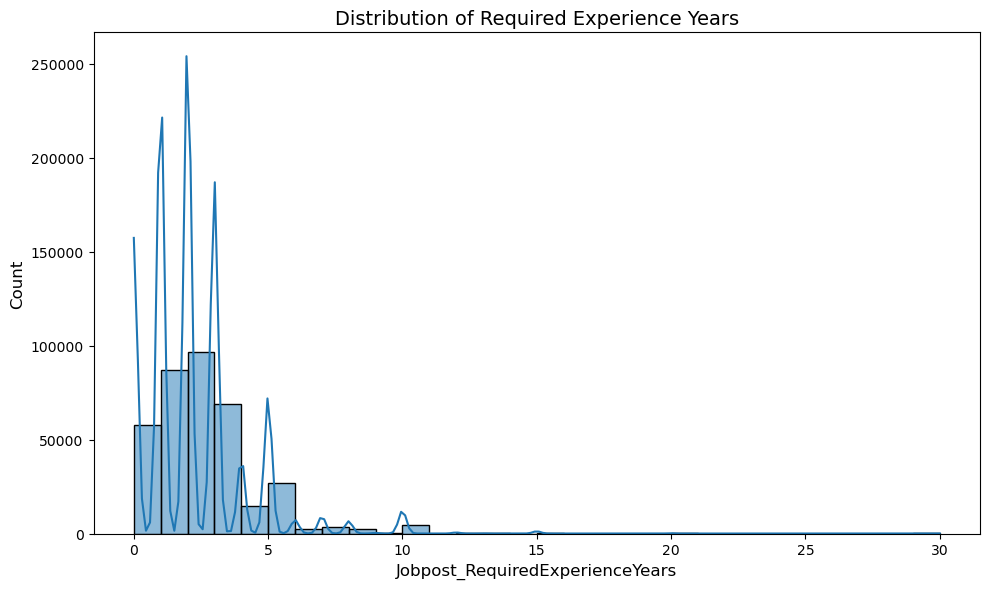

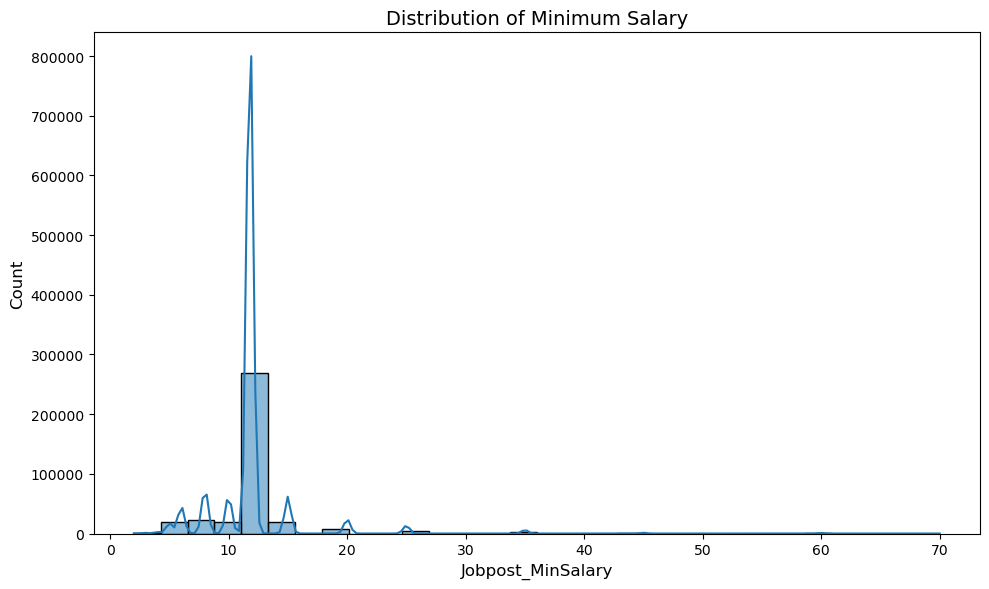

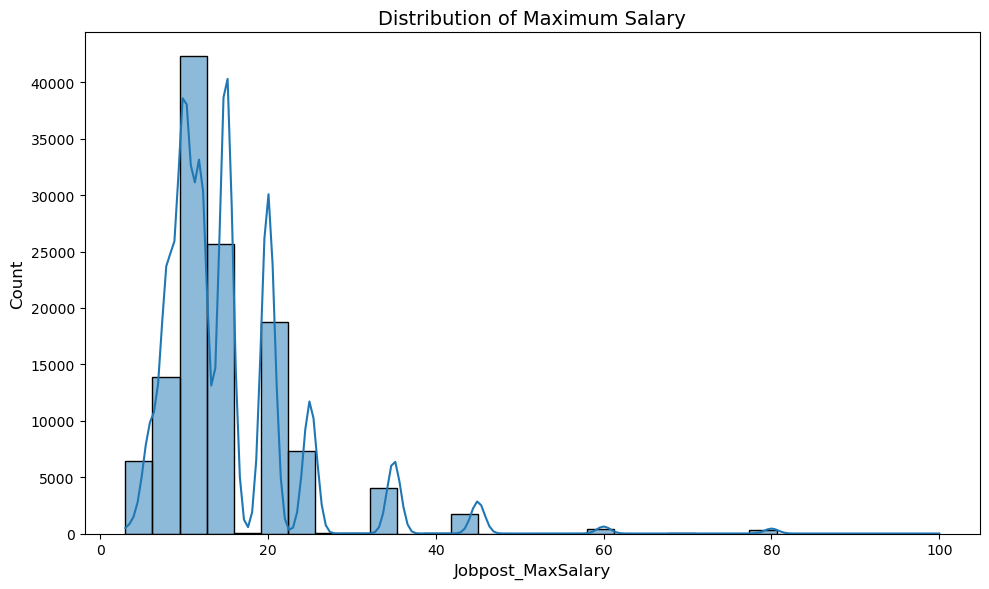

In [77]:


# ==========================
# 6. نمودارهای عددی
# ==========================
def plot_numerical_distribution(column, title, filename):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_new, x=column, bins=30, kde=True)
    plt.title(title, fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()
    # plt.savefig(filename)
    # plt.close()

plot_numerical_distribution('Jobpost_RequiredExperienceYears', 'Distribution of Required Experience Years', 'experience_distribution.png')
plot_numerical_distribution('Jobpost_MinSalary', 'Distribution of Minimum Salary', 'min_salary_distribution.png')
plot_numerical_distribution('Jobpost_MaxSalary', 'Distribution of Maximum Salary', 'max_salary_distribution.png')


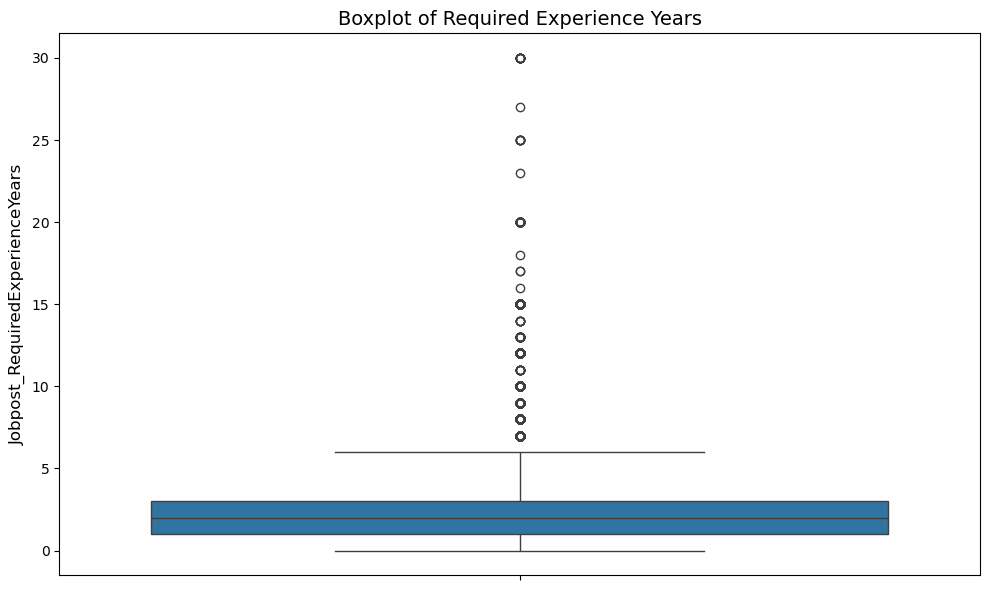

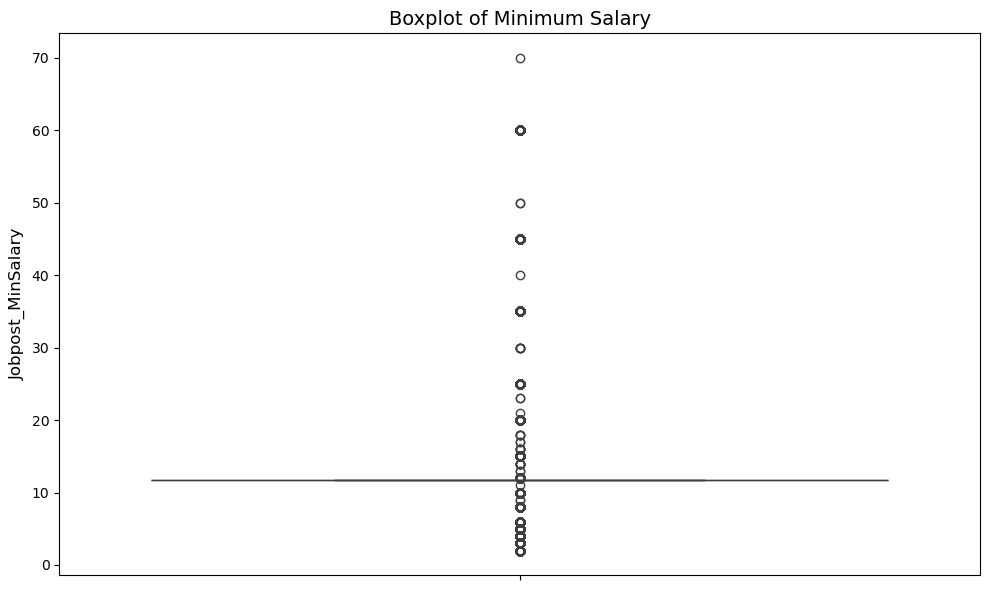

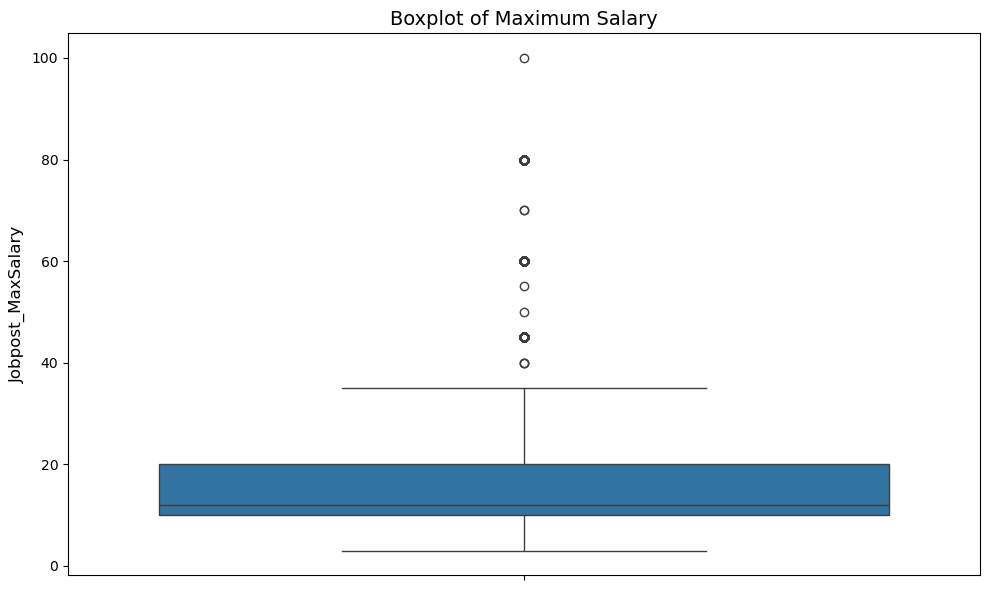

In [78]:

# ==========================
# 7. نمودار جعبه‌ای
# ==========================
def plot_boxplot(column, title, filename):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_new, y=column)
    plt.title(title, fontsize=14)
    plt.ylabel(column, fontsize=12)
    plt.tight_layout()
    # plt.savefig(filename)
    # plt.close()

plot_boxplot('Jobpost_RequiredExperienceYears', 'Boxplot of Required Experience Years', 'experience_boxplot.png')
plot_boxplot('Jobpost_MinSalary', 'Boxplot of Minimum Salary', 'min_salary_boxplot.png')
plot_boxplot('Jobpost_MaxSalary', 'Boxplot of Maximum Salary', 'max_salary_boxplot.png')


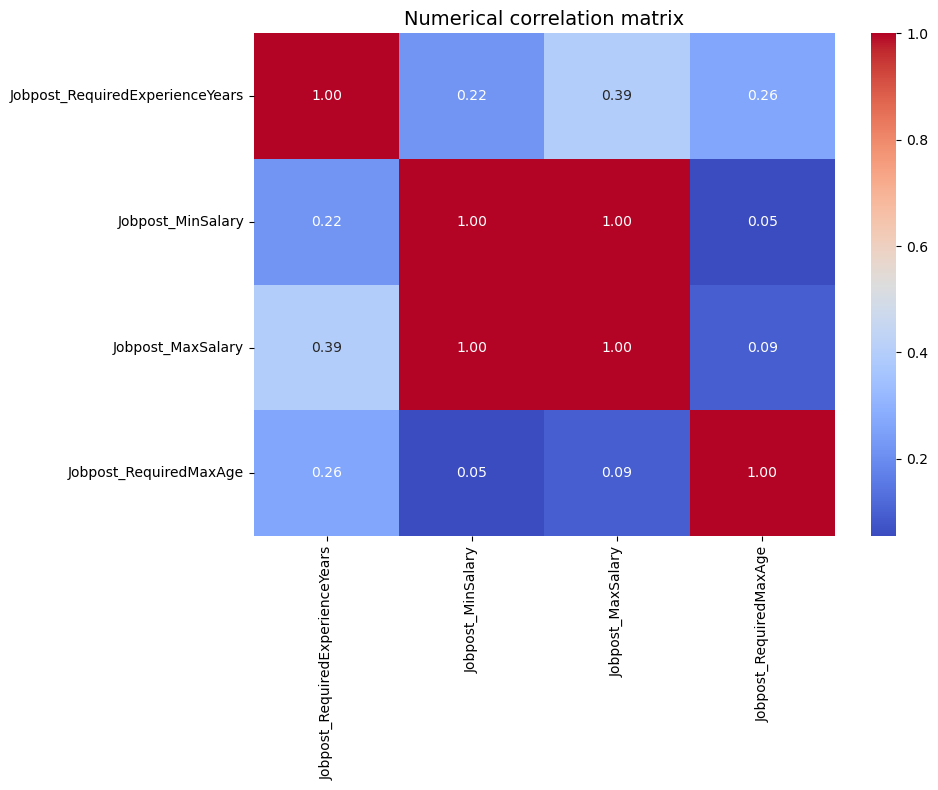

In [79]:

# ==========================
# 8. ماتریس همبستگی
# ==========================
df_new[['Jobpost_RequiredExperienceYears', 'Jobpost_MinSalary', 'Jobpost_MaxSalary', 'Jobpost_RequiredMaxAge', 'Company_AgeFromEstablishmentYear']]
numeric_cols = ['Jobpost_RequiredExperienceYears', 'Jobpost_MinSalary', 'Jobpost_MaxSalary', 'Jobpost_RequiredMaxAge']
plt.figure(figsize=(10, 8))
sns.heatmap(df_new[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Numerical correlation matrix', fontsize=14)
plt.tight_layout()
# plt.savefig('correlation_matrix.png')
# plt.close()


In [80]:

# ==========================
# 9. آنالیز متن‌ها (مهارت‌ها)
# ==========================
def plot_top_words(column, title, filename, n=10):
    all_words = []
    for entry in df_new[column].dropna():
        words = re.split(r',|\s+', entry)
        all_words.extend([word.strip() for word in words if word.strip()])

    word_counts = Counter(all_words)
    top_words = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:n])

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(top_words.values()), y=list(top_words.keys()))
    plt.title(title, fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Skill', fontsize=12)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

plot_top_words('Jobpost_LanguageSkills', 'Most Frequent Language Skills', 'language_skills.png')
plot_top_words('Jobpost_SoftwareSkills', 'Most Frequent Software Skills', 'software_skills.png')


 تعریف ستون‌ها

In [81]:

target_col = "Jobpost_MaxSalary"

categorical_cols = [
    'Jobpost_MainJobCategory',
    'Jobpost_IndustryFa',
    'Jobpost_WorkTypeFa',
    'Jobpost_IsRemote',
    'Jobpost_IsInternship',
    'Jobpost_PreferredGender',
    'Jobpost_ProvinceFa',
    'Company_ProvinceFa',
    'Company_CityFa',
    'Comany_CompanyOwnershipTypesFa',
    'Company_SizeFa',
    'Company_ActivityTypeFa',
    'Company_IndustryFa',
    'Company_AgeFromEstablishmentYear'
]

numerical_cols = [
    'Jobpost_MinSalary',
    'Jobpost_RequiredExperienceYears',
    'Jobpost_RequiredMaxAge'
]


کلاس سفارشی برای پردازش مهارت‌ها

In [89]:
class SkillsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, language_col='Jobpost_LanguageSkills', software_col='Jobpost_SoftwareSkills', top_n=50):
        self.language_col = language_col
        self.software_col = software_col
        self.top_n = top_n
        self.mlb = MultiLabelBinarizer()
        self.common_skills_ = None

    def fit(self, X, y=None):
        # استخراج مهارت‌های زبانی و نرم‌افزاری
        language_skills = X[self.language_col].fillna('').apply(self.extract_skills).tolist()
        software_skills = X[self.software_col].fillna('').apply(self.extract_skills).tolist()
        # ترکیب مهارت‌ها
        combined_skills = [lang + soft for lang, soft in zip(language_skills, software_skills)]
        # محاسبه مهارت‌های رایج
        all_skills = [skill for sublist in combined_skills for skill in sublist]
        self.common_skills_ = [skill for skill, count in Counter(all_skills).most_common(self.top_n)]
        # تنظیم MultiLabelBinarizer با مهارت‌های رایج
        self.mlb.fit([self.common_skills_])
        return self

    def transform(self, X, y=None):
        # استخراج مهارت‌های زبانی و نرم‌افزاری
        language_skills = X[self.language_col].fillna('').apply(self.extract_skills).tolist()
        software_skills = X[self.software_col].fillna('').apply(self.extract_skills).tolist()
        # ترکیب مهارت‌ها
        combined_skills = [lang + soft for lang, soft in zip(language_skills, software_skills)]
        # تبدیل مهارت‌ها به ماتریس باینری
        return self.mlb.transform(combined_skills)

    def extract_skills(self, text):
        return [skill.strip() for skill in text.split(',') if skill.strip()]

حذف ردیف‌هایی که مقدار هدف ندارند

In [90]:

df_model = df_new.dropna(subset=[target_col]).copy()

# تبدیل زمان فعال‌سازی به دو ستون جداگانه
df_model["Activation_Year"] = (
    pd.to_numeric(df_model["Jobpost_ActivationTime_YEAR_MONTH"].astype(str).str[:4], errors="coerce")
)
df_model["Activation_Month"] = (
    pd.to_numeric(df_model["Jobpost_ActivationTime_YEAR_MONTH"].astype(str).str[4:], errors="coerce")
)

numerical_cols.extend(["Activation_Year", "Activation_Month"])


 تفکیک X و y

In [84]:

X = df_model[categorical_cols + numerical_cols + [
    "Jobpost_LanguageSkills",
    "Jobpost_SoftwareSkills"
]]
y = df_model[target_col]


 ساخت ColumnTransformer

In [91]:
skills_cols = ["Jobpost_LanguageSkills", "Jobpost_SoftwareSkills"]

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('numerical', StandardScaler(), numerical_cols),
        ('skills', SkillsTransformer(), skills_cols)
    ]
)

Split دیتاست

In [92]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


تعریف مدل‌ها

In [93]:

models = {
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}


آموزش و ارزیابی مدل‌ها

In [94]:
results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "R2": r2}

results_df = pd.DataFrame(results).T
print(results_df)


c:\Users\Sepehr\miniconda3\envs\ml_env\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['"Languages_TitleEn":"Arabic"', '"Languages_TitleEn":"Armenian"', '"Languages_TitleEn":"Chinese"', '"Languages_TitleEn":"Dutch"', '"Languages_TitleEn":"French"', '"Languages_TitleEn":"German"', '"Languages_TitleEn":"Hindi"', '"Languages_TitleEn":"Italian"', '"Languages_TitleEn":"Japanese"', '"Languages_TitleEn":"Korean"', '"Languages_TitleEn":"Kurdish"', '"Languages_TitleEn":"Portuguese"', '"Languages_TitleEn":"Russian"', '"Languages_TitleEn":"Spanish"', '"Languages_TitleEn":"Turkish"', '"Level":"بالاتر از متوسط ۷۰٪"}', '"Level":"در حد زبان مادری ۱۰۰٪"}', '"Level":"در حد زبان مادری ۱۰۰٪"}]', '"Level":"متوسط ۵۰٪"}', '"Level":"مقدماتی ۱۰٪"}', '"Level":"پایین تر از متوسط ۳۰٪"}', '"Level":"پیشرفته ۹۰٪"}', '"TitleEn":".Net Core \\/ .Net"', '"TitleEn":"3D Studio Max"', '"TitleEn":"A+"', '"TitleEn":"AAA (Advanced Aircraft Analysis)"', '"TitleEn":"ACD See"', '"TitleEn":

                        MSE        R2
Gradient Boosting  0.006756  0.999903


c:\Users\Sepehr\miniconda3\envs\ml_env\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['"Languages_TitleEn":"Arabic"', '"Languages_TitleEn":"Armenian"', '"Languages_TitleEn":"Chinese"', '"Languages_TitleEn":"French"', '"Languages_TitleEn":"German"', '"Languages_TitleEn":"Greek"', '"Languages_TitleEn":"Italian"', '"Languages_TitleEn":"Japanese"', '"Languages_TitleEn":"Korean"', '"Languages_TitleEn":"Russian"', '"Languages_TitleEn":"Spanish"', '"Languages_TitleEn":"Turkish"', '"Level":"بالاتر از متوسط ۷۰٪"}', '"Level":"در حد زبان مادری ۱۰۰٪"}', '"Level":"در حد زبان مادری ۱۰۰٪"}]', '"Level":"متوسط ۵۰٪"}', '"Level":"مقدماتی ۱۰٪"}', '"Level":"پایین تر از متوسط ۳۰٪"}', '"Level":"پیشرفته ۹۰٪"}', '"TitleEn":".Net Core \\/ .Net"', '"TitleEn":"3D Studio Max"', '"TitleEn":"A+"', '"TitleEn":"AAA (Advanced Aircraft Analysis)"', '"TitleEn":"ACD See"', '"TitleEn":"ADS (Advanced Design Systems)"', '"TitleEn":"AIMMS Solver"', '"TitleEn":"ARC View"', '"TitleEn":"AR